![Admissions](images/ex_octave_2_admissions.jpg)

# Logistic Regression analysis using GNU Octave: School Admissions

In this example, built is a logistic regression model to predict whether a student gets admitted into a university. The model predicts whether the student gets admitted based on results on two exams. Model training is using historical data from previous applicants. 

For each training example, we have the applicant’s scores on two exams and the admissions decision.

Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples.


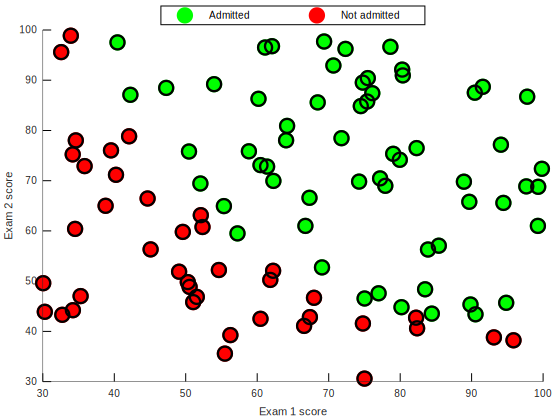

In [168]:
%% Initialization
clear; close all; clc

addpath ("../code/octave/logistic_regression_admissions/")

%% Load Data
%  The first two columns contains the exam scores and the third column
%  contains the label.

data = load('../datasets/admissions_data.csv');
X = data(:, [1, 2]); y = data(:, 3);

%% ==================== Part 1: Plotting ====================
%  We start the exercise by first plotting the data to understand the 
%  the problem we are working with.

fprintf(['Plotting data with + indicating (y = 1) examples and o ' ...
         'indicating (y = 0) examples.\n']);

plotData(X, y);

% Put some labels 
hold on;
% Labels and Legend
xlabel('Exam 1 score')
ylabel('Exam 2 score')

% Specified in plot order
h = legend ('Admitted', 'Not admitted');
legend (h, "location", "northoutside", "orientation", "horizontal");
hold off;

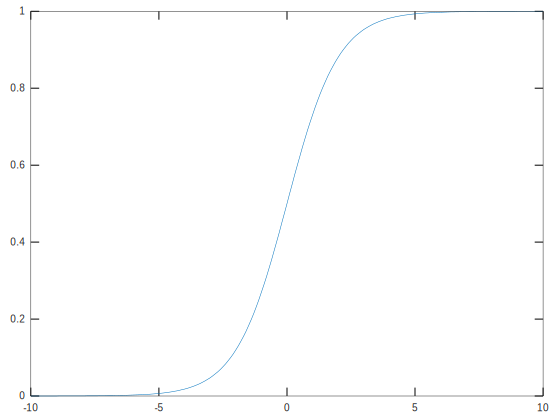

In [92]:
x = -10:0.1:10;
y = sigmoid(x);
plot(x,y)

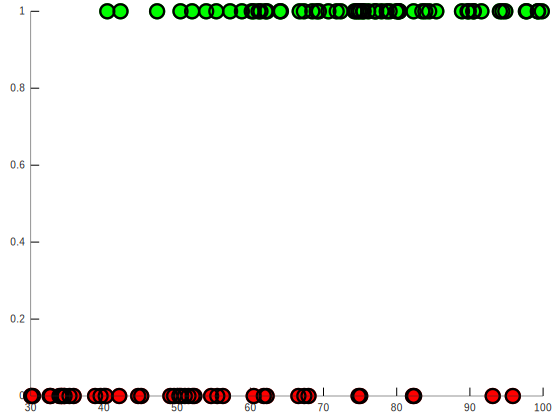

In [96]:
X1 = X(:,1);
plotFeature(X1, y)

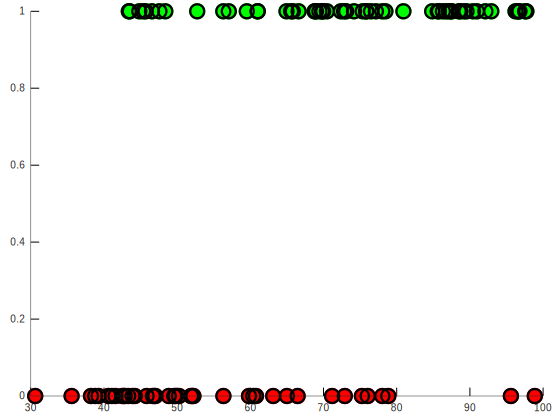

In [97]:
X2 = X(:,2);
plotFeature(X2, y)

In [169]:
%% ============ Part 2: Compute Cost and Gradient ============
%  In this part, we will implement the cost and gradient
%  for logistic regression.

%  Setup the data matrix appropriately, and add ones for the intercept term
[m, n] = size(X);

% Add intercept term to x and X_test
X = [ones(m, 1) X];

% Initialize fitting parameters
initial_theta = zeros(n + 1, 1);

% Compute and display initial cost and gradient
[cost, grad] = costFunction(initial_theta, X, y);

fprintf('Cost at initial theta (zeros): %f\n', cost);
fprintf('Gradient at initial theta (zeros): \n');
fprintf(' %f \n', grad);

Cost at initial theta (zeros): 0.693147
Gradient at initial theta (zeros): 
 -0.100000 
 -12.009217 
 -11.262842 


Cost at theta found by fminunc: 0.203498
theta: 
b0=-25.16, b1=0.21, b2=0.20 


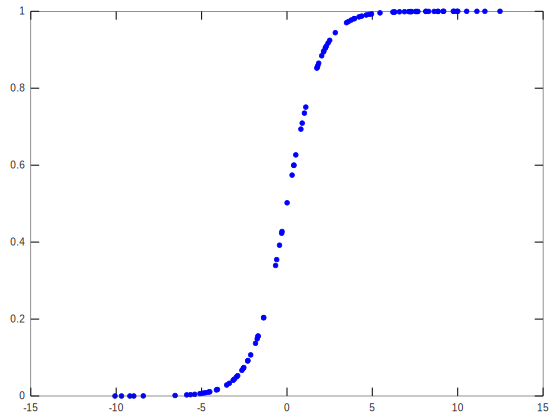

In [170]:
%% ============= Part 3: Optimizing using fminunc  =============
%  In this part, we will use a built-in function (fminunc) to find the
%  optimal parameters theta.

%  Set options for fminunc
options = optimset('GradObj', 'on', 'MaxIter', 400);

figure; hold on;
%  Run fminunc to obtain the optimal theta
%  This function will return theta and the cost 
[theta, cost] = ...
	fminunc(@(t)(costFunction(t, X, y)), initial_theta, options);
hold off;

% Print theta to screen
fprintf('Cost at theta found by fminunc: %f\n', cost);
fprintf('theta: \n');
fprintf('b0=%4.2f, b1=%4.2f, b2=%4.2f \n', theta);

xt2 = X*theta;
ys = sigmoid(xt2);
plot(xt2, ys, 'k.', 'MarkerEdgeColor', 'b', 'MarkerFaceColor', 'none', 'MarkerSize', 7);


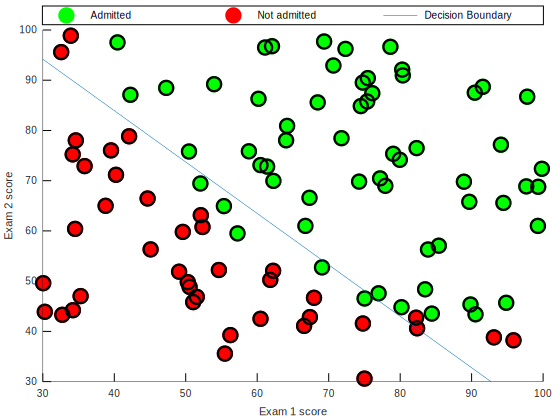

In [5]:
% Plot Boundary
plotDecisionBoundary(theta, X, y);

% Put some labels 
hold on;
% Labels and Legend
xlabel('Exam 1 score')
ylabel('Exam 2 score')

% Specified in plot order
h = legend ('Admitted', 'Not admitted');
legend (h, "location", "northoutside", "orientation", "horizontal");
hold off;

In [2]:
%% ============== Part 4: Predict and Accuracies ==============
%  After learning the parameters, you will like to use it to predict the outcomes
%  on unseen data. In this part, we will use the logistic regression model
%  to predict the probability that a student with score 45 on exam 1 and 
%  score 85 on exam 2 will be admitted.
%
%  Furthermore, we will compute the training and test set accuracies of
%  our model.

%  Predict probability for a student with score 45 on exam 1 
%  and score 85 on exam 2 

prob = sigmoid([1 45 85] * theta);
fprintf(['For a student with scores 45 and 85, we predict an admission ' ...
         'probability of %f\n\n'], prob);

% Compute accuracy on our training set
p = predict(theta, X);

fprintf('Train Accuracy: %f\n', mean(double(p == y)) * 100);


For a student with scores 45 and 85, we predict an admission probability of 0.776289

Train Accuracy: 89.000000
